# **Feature Importance and Predictive Modeling**

Feature importance analysis to identify which factors have the most significant impact on the level of lung cancer.

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00        82
         Low       1.00      1.00      1.00        55
      Medium       1.00      1.00      1.00        63

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix:
 [[82  0  0]
 [ 0 55  0]
 [ 0  0 63]]


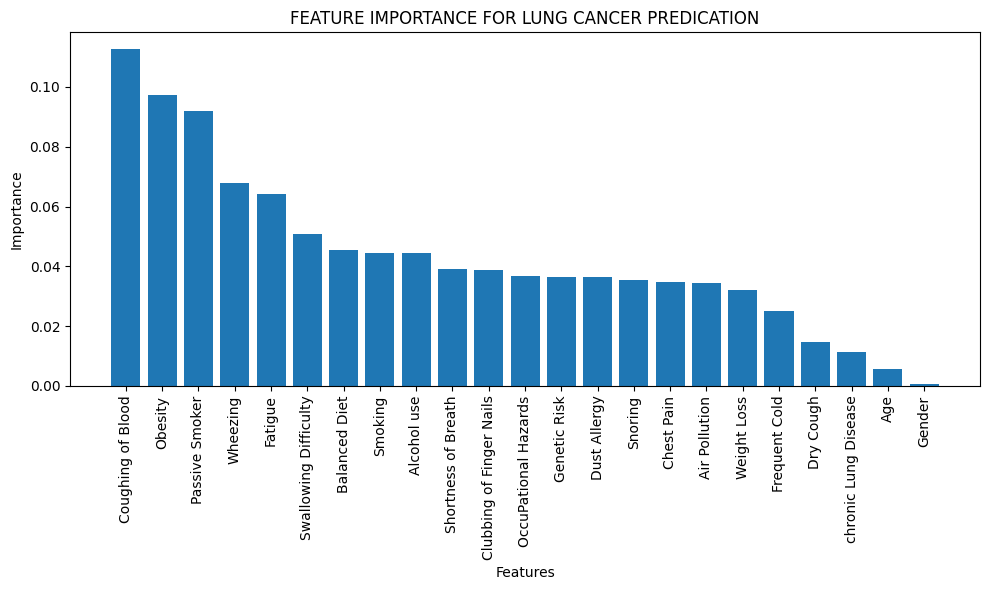

In [1]:
#import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

#load the dataset
data = pd.read_csv('/content/cancer patient data sets.csv')

#Step 1: Data Preprocessing
X = data.drop(columns = ['index', 'Patient Id', 'Level']) # Features
y = data['Level'] # Target variable

#Step 2: Feature Importance analysis
#Random Forest - feature importances

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X,y)
feature_importances = rf_model.feature_importances_

#Create a DataFrame - Store feature importance and sort them in descensing order
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by = "Importance", ascending = False)

#Step 3: Model Selection and Splitting
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Step 4: Model Training and Evalution
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(X_test)

#Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

#Step 5: Interpretation of feature Importance
plt.figure(figsize=(10,6))
plt.bar(feature_importance_df["Feature"], feature_importance_df["Importance"])
plt.xticks(rotation =90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance For Lung Cancer Predication')
plt.tight_layout()
plt.savefig('feature_importance_plot.png')
plt.show()

# **Gender Differences in Lung Cancer Risk**

Gender-based differences in lung cancer risk by analyzing the distribution of lung cancer levels.

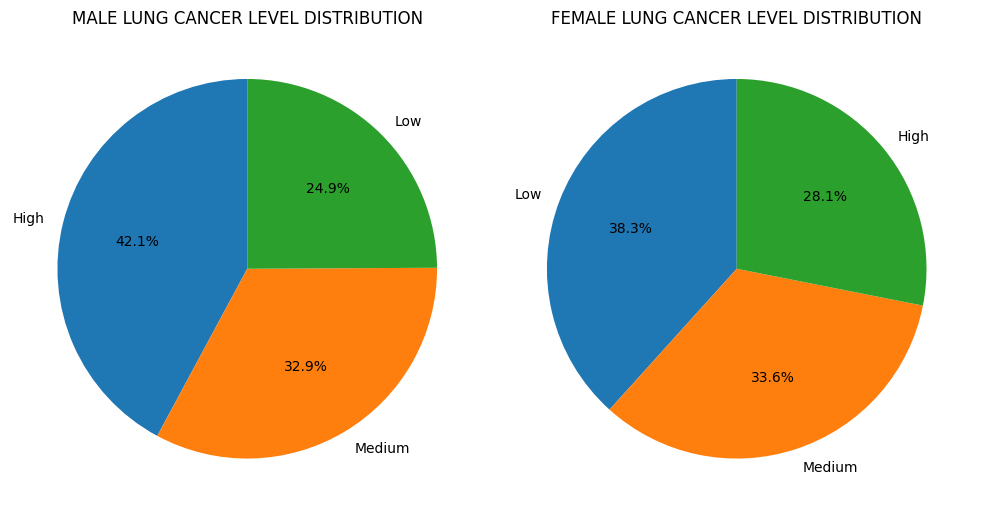

In [6]:
# Load the dataset
data1 = pd.read_csv('/content/cancer patient data sets.csv')

#Step 1: Data Preparation
male_data = data1[data1['Gender'] == 1]
female_data = data1[data1['Gender'] == 2]

#Step 2: Distribution of Lung Cancer Levels
male_level_distribution = male_data['Level'].value_counts()
female_level_distribution = female_data['Level'].value_counts()

#Plot distribution of lung cancer levels for each gender
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.pie(male_level_distribution, labels=male_level_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Male Lung Cancer Level Distribution')

plt.subplot(1, 2, 2)
plt.pie(female_level_distribution, labels=female_level_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Female Lung Cancer Level Distribution')

plt.tight_layout()
plt.savefig("distribution of lung cancer levels gender.png")
plt.show()

# **Lifestyle and Lung Cancer**

 Relationship between lifestyle factors (such as smoking, alcohol use, obesity) and lung cancer risk.

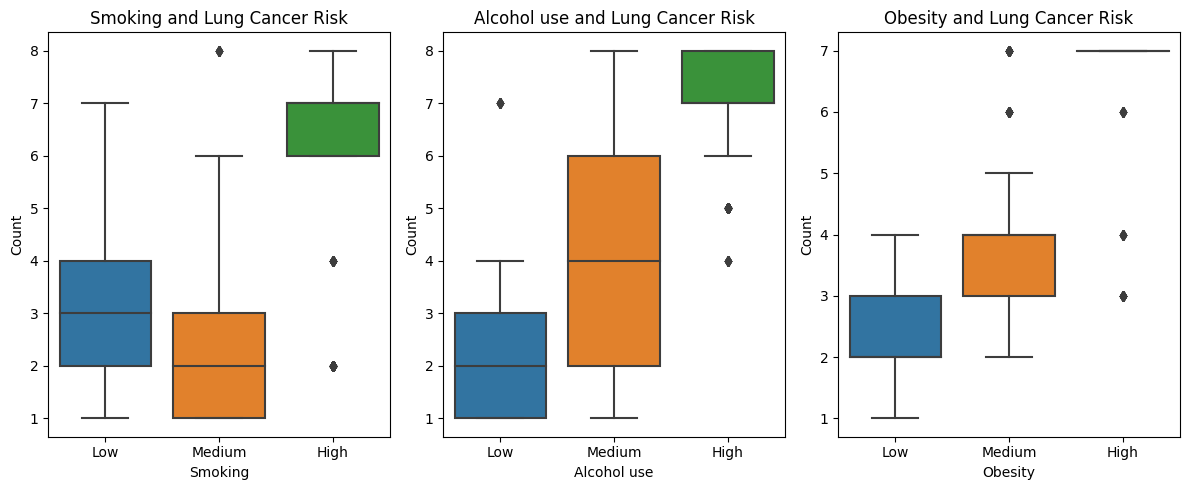

In [13]:
import seaborn as sns

#load the data
data3 = pd.read_csv('/content/cancer patient data sets.csv')

#Step 1: Data Preparartion
lifestyle_factors = ['Smoking', 'Alcohol use', 'Obesity']
lung_cancer_level = "Level"

#Step 2: Analyze lifestyle factors and Lung Cancer
plt.figure(figsize=(12,5))
for i, factor in enumerate(lifestyle_factors):
  plt.subplot(1, len(lifestyle_factors), i + 1)
  sns.boxplot(x=lung_cancer_level, y=factor, data=data)
  plt.title(f'{factor} and Lung Cancer Risk')
  plt.xlabel(factor)
  plt.ylabel('Count')
plt.tight_layout()
plt.savefig('lifestyle_factors_and_lung_cancer_risk.png')
plt.show()

# **Association of Environmental Factors with Lung Cancer**

Explore the impact of environmental factors like air pollution, dust allergies, and occupational hazards on the prevalence.

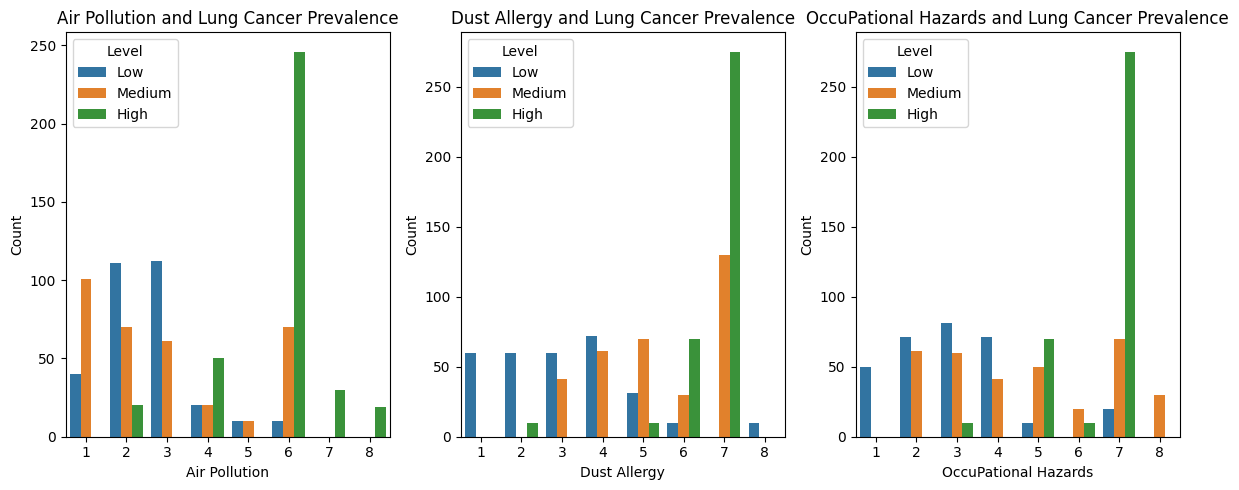

In [17]:
#Load the dataset
data4 = pd.read_csv('/content/cancer patient data sets.csv')

#Step 1: Data Preparation
environmental_factors = ['Air Pollution', 'Dust Allergy', 'OccuPational Hazards']
lung_cancer_level = 'Level'

#Step 2: Analyze Environmental Factors and Lung Cancer Prevalence
plt.figure(figsize=(12, 5))
for i, factor in enumerate(environmental_factors):
    plt.subplot(1, len(environmental_factors), i + 1)
    sns.countplot(x=factor, hue=lung_cancer_level, data=data)
    plt.title(f'{factor} and Lung Cancer Prevalence')
    plt.xlabel(factor)
    plt.ylabel('Count')
plt.tight_layout()
plt.savefig('environmental_factors_and_lung_cancer_prevalence.png')
plt.show()

# **Comorbidity Analysis**
Investigate if patients with pre-existing chronic lung diseases have a higher risk of developing lung cancer

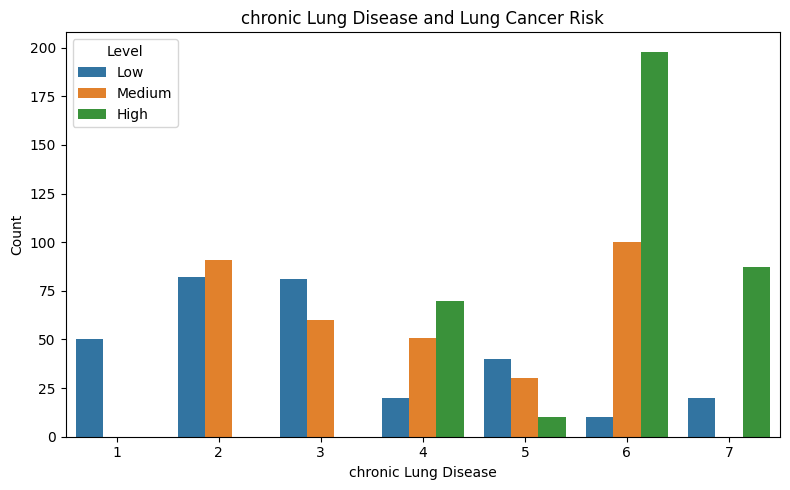

In [19]:
#Load the dataset
data5 = pd.read_csv('/content/cancer patient data sets.csv')

#Step 1: Data Preparation
chronic_lung_diseases = ['chronic Lung Disease']
lung_cancer_level = 'Level'

#Step 2: Analyze Comorbidity and Lung Cancer Risk
plt.figure(figsize=(8, 5))
for i, disease in enumerate(chronic_lung_diseases):
    plt.subplot(1, len(chronic_lung_diseases), i + 1)
    sns.countplot(x=disease, hue=lung_cancer_level, data=data)
    plt.title(f'{disease} and Lung Cancer Risk')
    plt.xlabel(disease)
    plt.ylabel('Count')
plt.tight_layout()
plt.savefig('comorbidity_and_lung_cancer_risk.png')
plt.show()

# **Symptom Clustering and Disease Progression**

Clustering to identify groups of patients based on their symptoms. Analyze how symptom clusters are associated with disease progression and response to treatment.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


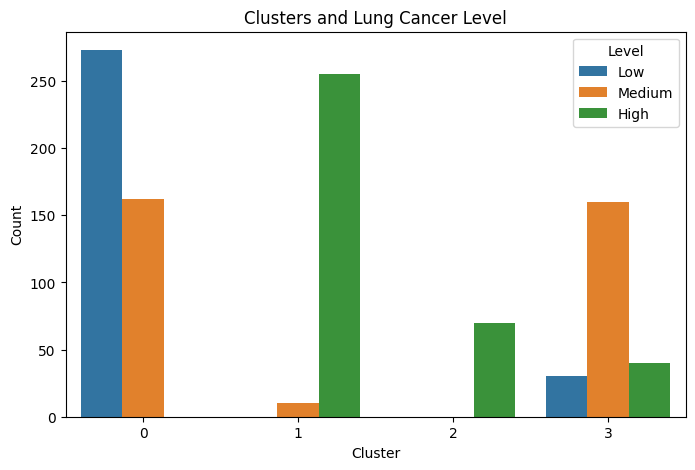

Level        High       Low    Medium
Cluster                              
0             NaN  0.627586  0.372414
1        0.962264       NaN  0.037736
2        1.000000       NaN       NaN
3        0.173913  0.130435  0.695652


In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
data6 = pd.read_csv("/content/cancer patient data sets.csv")

# Step 1: Data Preparation
symptoms_data = data6.iloc[:, 4:-1]

# Step 2: Feature Scaling
scaler = StandardScaler()
symptoms_data_scaled = scaler.fit_transform(symptoms_data)

# Step 3: Apply Clustering Algorithm (k-means)
num_cluster = 4
kmeans = KMeans(n_clusters=num_cluster, random_state=42)
cluster = kmeans.fit_predict(symptoms_data_scaled)

# Step 4: Analyze Cluster and Disease Progression
data6['Cluster'] = cluster

#Visualize the distribution of patients in each cluster
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', hue='Level', data=data6)
plt.title('Clusters and Lung Cancer Level')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.savefig('clusters_and_lung_cancer_level.png')
plt.show()

#Analyze disease progression and response to treatment for each cluster
cluster_summary = data6.groupby('Cluster')['Level'].value_counts(normalize=True).unstack()
print(cluster_summary)